# Pyber Ride Share

### Overview of Data Being Assessed
<b>Date Range:</b> January 1 - May 8, 2018  

<table align="left">


  <tr>
    <th></th>
    <th>Urban</th>
    <th>Suburban</th>
    <th>Rural</th>
    <th>Total</th>
  </tr>
  <tr>
    <td><b>Total Number of Cities per City Type</b></td>
    <td>66</td>
    <td>36</td>
    <td>18</td>
    <td>120</td>
  </tr>
  <tr>
    <td><b>Total Number of Rides per City Type</b></td>
    <td>1,625</td>
    <td>625</td>
    <td>125</td>
    <td>2,375</td>
  </tr>
  <tr>
    <td><b>Total Number of Drivers per City Type</b></td>
    <td>2,405</td>
    <td>490</td>
    <td>78</td>
    <td>2,973</td>
  </tr>
  <tr>
    <td><b>Total Fares per City Type ($)</b></td>
    <td>39,854.38</td>
    <td>19,356.33</td>
    <td>4,327.93</td>
    <td>63,538.64</td>
  </tr>

</table>



### Analysis

<ul>
  <li>The Urban cities rank highest overall in Total Fares at 62.7% with 68.4% of Total Riders.   </li>
  <li>The number of drivers for Suburban and Rural areas is not proportional to Urban areas. The total number of Urban drivers make up 80.9% of all Pyber drivers but drive only 68.4% of total riders.   </li>
  <li>On average, fares per Rural rider was higher than both Urban and Suburban individual fares. This could be the result of more mileage or time to get to the rider's destination. </li>
</ul>



In [1]:
%matplotlib inline

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load file and Read the City Data
city_data_to_load = "data/city_data.csv"
city_data_df = pd.read_csv(city_data_to_load) 

# dropping ALL duplicte values 
city_data_df = city_data_df.drop_duplicates(subset ="city", 
                     keep = "first") 

# Quick review of data
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Load file and Read the City and Ride Data
ride_data_to_load = "data/ride_data.csv"
ride_data_df = pd.read_csv(ride_data_to_load)

# Quick review of data
ride_data_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset

merged_data_df = pd.merge(ride_data_df,city_data_df,  on="city")
#merged_data_df.reset_index(drop=True)                        
             
                
# Display the data table for preview
merged_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
# Obtain the x and y coordinates for each city

# X-Axis rides by city
number_of_rides = merged_data_df.groupby("city")["ride_id"].count()

# y-axis avg fare
avg_fare = round(merged_data_df.groupby("city")["fare"].mean(),2)


# number of drivers
number_of_drivers = merged_data_df.groupby("city")["driver_count"].mean()

# city type
city_types = city_data_df.set_index("city")["type"]

# create df
city_info = pd.DataFrame({
    "Number of Rides": number_of_rides,
    "Average Fare": avg_fare,
    "Number of Drivers": number_of_drivers,
    "Type of City": city_types})

city_info.head()


,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.64,12,Urban
Barajasview,22,25.33,26,Urban
Barronchester,16,36.42,11,Suburban
Bethanyland,18,32.96,22,Suburban
Bradshawfurt,10,40.06,7,Rural


In [6]:
# divide city data by type
urban = city_info.loc[city_info["Type of City"]== "Urban"]
suburban = city_info.loc[city_info["Type of City"]== "Suburban"]
rural = city_info.loc[city_info["Type of City"]== "Rural"]


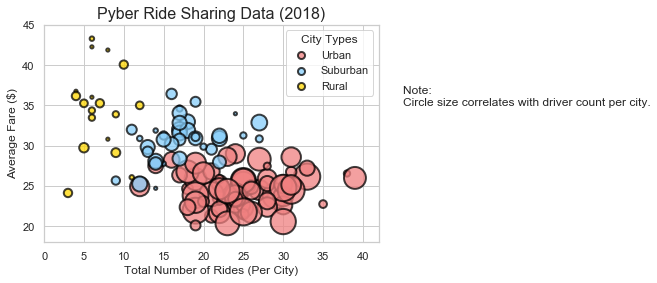

In [12]:
# set style
sns.set(style='whitegrid', context='notebook')

# Build the scatter plots for each city types

plt.scatter(urban["Number of Rides"], urban["Average Fare"], facecolor = "lightcoral", edgecolors="black", \
            s = urban["Number of Drivers"]*10, label = "Urban", alpha = 0.75, linewidth = 2)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], color = "lightskyblue", edgecolors ="black", \
            s = suburban["Number of Drivers"]*10, label = "Suburban", alpha = .75, linewidth = 2)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare"], color = "gold", edgecolors = "black", \
            s = rural["Number of Drivers"]*10, label = "Rural", alpha = .75, linewidth = 2)


# Create Limits
plt.xlim(0,42)
plt.ylim(18,45)


# Incorporate the other graph properties

# Create a legend


#plt.legend(title="City Types", loc= "upper right", fancybox=True)
legend_style = plt.legend(title="City Types", fancybox=True)
legend_style.legendHandles[0]._sizes = [50]
legend_style.legendHandles[1]._sizes = [50]
legend_style.legendHandles[2]._sizes = [50]


# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2018)",{"fontsize":16})
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(45,35,"Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("images/rideshare.png")
plt.show()

## Total Fares by City Type

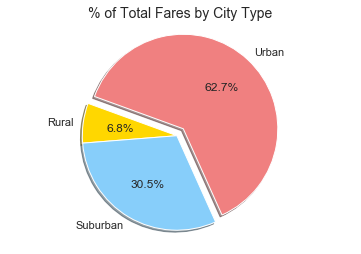

In [13]:
# Calculate Type Percents
fares_by_city_type = pd.DataFrame(merged_data_df.groupby("type")["fare"].sum())
#fares_by_city_type.head()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(fares_by_city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Fares by City Type",{'fontsize':14})

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/TotalFaresByCity.png")
plt.show()




## Total Rides by City Type

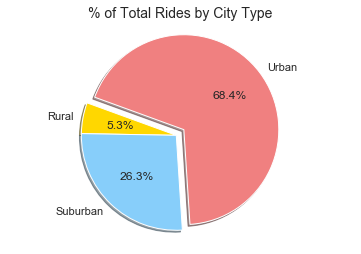

In [14]:
# Calculate Ride Percents
total_rides_by_city_type = pd.DataFrame(merged_data_df.groupby("type")["ride_id"].count())
total_rides_by_city_type.head()

# Build Pie Chart
#total_rides_by_city_type.index

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(total_rides_by_city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Rides by City Type",{'fontsize':14})

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/TotalRidesByCity.png")
plt.show()

# Save Figure


## Total Drivers by City Type

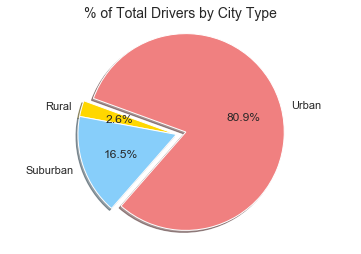

In [15]:
# Calculate Driver Percents

#total_drivers_by_city_type = pd.DataFrame(merged_data_df.groupby("type")["driver_count"].sum())
total_drivers_by_city_type = pd.DataFrame(city_data_df.groupby("type")["driver_count"].sum())
total_rides_by_city_type.head()

# Build Pie Chart
#total_rides_by_city_type.index

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(total_drivers_by_city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type",{'fontsize':14})

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("images/TotalDriversByCity.png")
plt.show()